#Demo 1 - Operações básicas em DL via Keras (Base Fashion_MNIST)

Dr. Ahirton Lopes

Se você quiser digitar junto ...

Execute um Notebook Jupyter local ou:

Binder: Notebook Jupyter no Navegador

Colaboratory: "Google Docs para Notebooks Jupyter"

In [1]:
import keras
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from random import randint
from keras.models import Sequential

In [2]:
# Configurar nossos sets de treinamento e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


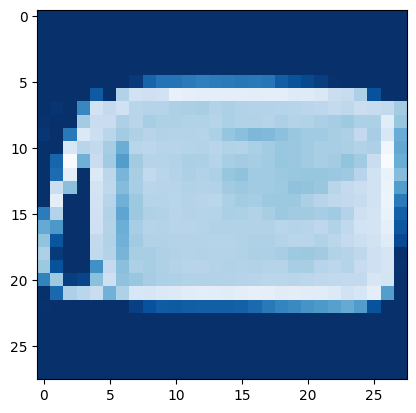

In [3]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='Blues_r'); #Testar com outros itens - só mudar o cmap - cmaps possíveis: #Testar com outros itens - só mudar o cmap - cmaps possíveis: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r e +

In [4]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [7]:
# Definindo nosso modelo

model = Sequential()
model.add(Conv2D(32,
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# Definindo nosso treinamento

training = model.fit(x_train,
                     y_train,
                     epochs=1,
                     verbose=True,
                     validation_split=0.1)

1688/1688 [==============================] - 13s 5ms/step - loss: 0.6886 - accuracy: 0.8474 - val_loss: 0.3352 - val_accuracy: 0.8767


In [11]:
loss, accuracy = model.evaluate(x_test,
                                y_test,
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8717
Test loss: 0.36
Test accuracy: 87.170%
